In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import math

## Binomiale verdeling

Weigh in motion is een geautomatiseerde manier om het gewicht van vrachtwagens te meten door middel van sensoren in het wegdek . Wanneer de vrachtwagen voorbij rijdt wordt zijn lengte, snelheid, gewicht en nummerplaat geregistreerd. Vrachtwagens die overladen zijn kunnen op die manier zeer snel opgespoord en beboet worden. 
Het maximaal toegelaten gewicht van vrachtwagens op Belgische wegen hangt onder andere af van het aantal assen waarmee de oplegger is uitgerust. Wij gaan bij deze oefening uit van een overgewicht wanneer de meting 40 ton overschrijdt.

Het bestand 'wim.csv' bevat 1000 opeenvolgende wegingen van vrachtwagens. De gewichten worden uitgedrukt in ton (=duizend kilo). Gebruik en verwerk deze informatie om onderstaande vragen te beantwoorden.

    a. Van de volgende 200 vrachtwagens, hoeveel zullen er naar verwachting overladen zijn?
    
    b. Wat is de kans dat van de volgende 10 vrachtwagens er geen enkele overladen is?
    
    c. Wat is de kans dat van de volgende 10 vrachtwagens er exact 2 overladen zijn?
    
    d. Wat is de kans dat drie opeenvolgende vrachtwagens overladen zijn?
    
    e. Wat is de kans dat van de komende 20 vrachtwagens er minder dan 5 overladen zijn?
    
    f. Wat is de kans dat van de komende 20 vrachtwagens er meer dan de helf overladen is?
    
Bepaal in eerste instantie op basis van de data de kans op een overtreding. Deze kans kan je vervolgens verder in de berekeningen gebruiken. 

In [3]:
# Inlezen van de dataset

dataset = pd.read_csv('wim.csv')
dataset.head()

,Gewicht
0,20
1,23
2,9
3,30
4,35


In [33]:
# Bepalen van de kans op een overtreding

max_gewicht = 40
overtredings_kans = float(dataset.loc[dataset['Gewicht'] > max_gewicht].count() / dataset["Gewicht"].count())
print("{0:.2%}".format(overtredings_kans))

24.60%


In [32]:
#    a. Van de volgende 200 vrachtwagens, hoeveel zullen er naar verwachting overladen zijn?
print('In de komende 200 vrachtwagens zullen er waarschijnlijk', 200 * overtredings_kans ,'overladen zijn')
    
#    b. Wat is de kans dat van de volgende 10 vrachtwagens er geen enkele overladen is?
print('Kans dat er van de volgende 10 geen enkele is overladen: ', "{0:.2%}".format(stats.binom.pmf(0, 10, overtredings_kans)))
#    c. Wat is de kans dat van de volgende 10 vrachtwagens er exact 2 overladen zijn?
print('Kans dat er van de volgende 10 exact 2 zijn overladen: ', "{0:.2%}".format(stats.binom.pmf(2, 10, overtredings_kans)))

#    d. Wat is de kans dat drie opeenvolgende vrachtwagens overladen zijn?
print('Kans dat er 3 opeenvolgende overladen zijn: ', "{0:.2%}".format(stats.binom.pmf(3, 3, overtredings_kans)))
    
#    e. Wat is de kans dat van de komende 20 vrachtwagens er minder dan 5 overladen zijn?
print('Kans dat er minder dan 5 overladen zijn bij de volgende 20: ', "{0:.2%}".format(stats.binom.cdf(5, 20, overtredings_kans)))
    
#    f. Wat is de kans dat van de komende 20 vrachtwagens er meer dan de helf overladen is?
print('Kans dat er meer dan de helft overladen zijn bij de volgende 20: ', "{0:.2%}".format(1.0 - stats.binom.cdf(10, 20, overtredings_kans)))


In de komende 200 vrachtwagens zullen er waarschijnlijk 49.2 overladen zijn
Kans dat er van de volgende 10 geen enkele is overladen:  5.94%
Kans dat er van de volgende 10 exact 2 zijn overladen:  28.45%
Kans dat er 3 opeenvolgende overladen zijn:  1.49%
Kans dat er minder dan 5 overladen zijn bij de volgende 20:  63.33%
Kans dat er meer dan de helft overladen zijn bij de volgende 20:  0.34%


## Poisson verdeling

Een bepaalde webserver krijgt per seconde een hoeveelheid requests te verwerken. Een log van het aantal requests per seconde kan je vinden in het webserver.csv. Gebruik deze informatie om onderstaande vragen te beantwoorden. Je mag ervan uitgaan dat het aantal requests Poisson is verdeeld.

    a. Bepaal de verwachtingswaarde λ. Gebruik deze waarde in de verdere berekeningen.
    
    b. Bepaal de kans dat de server minder dan 45 requests per seconde te verwerken krijgt.
    
    c. Het maximaal aantal requests per seconde die de server kan verwerken ligt op 80. Bepaal de kans dat de server plat gaat door een teveel aan requests.

In [36]:
# Inlezen van de dataset

dataset = pd.read_csv('webserver.csv')
dataset.head()

,Requests
0,57
1,63
2,53
3,57
4,54


In [42]:
# a. Bepaal de verwachtingswaarde λ. Gebruik deze waarde in de verdere berekeningen.
mean_request_count = float(dataset["Requests"].mean())
print(mean_request_count)
# b. Bepaal de kans dat de server minder dan 45 requests per seconde te verwerken krijgt.
print('Kans op minder dan 45 requests per seconde: ', "{0:.2%}".format(stats.poisson.cdf(45, mean_request_count)))
 
# c. Het maximaal aantal requests per seconde die de server kan verwerken ligt op 80...
#    ...Bepaal de kans dat de server plat gaat door een teveel aan requests.
print('Kans op server crash: ', "{0:.2%}".format(1 - stats.poisson.cdf(80, mean_request_count)))



55.24125
Kans op minder dan 45 requests per seconde:  9.19%
Kans op server crash:  0.07%


## Normaalverdeling

De BMI is een index die de verhouding tussen lengte en gewicht bij een persoon weergeeft. De BMI wordt veel gebruikt om een indicatie te krijgen of er sprake is van overgewicht of ondergewicht.
Om de BMI van een persoon te berekenen deel je zijn/haar gewicht door het kwadraat van de lengte. Het gewicht wordt daarbij uitgedrukt in kilogram, de lengte in meter.
Weegt een persoon bijvoorbeeld 67kg en meet deze persoon 172cm, dan is de BMI gelijk aan:
$\frac{67}{1,72^2}=22,65$

Alhoewel de BMI niet altijd even betrouwbaar is hanteert men volgende tabel om de BMI te interpreteren.

| BMI | Interpretatie |
   ----------------  |  ------------- 
| 18,5 tot en met 25 | Normaal gewicht |
| 25 tot en met 27 | Licht overgewicht |
| 27 tot en met 30 | Matig overgewicht |
| 30 tot en met 40 | Ernstig overgewicht |
| Meer dan 40      | Ziekelijk overgewicht

Het bestand BMI.csv bevat lengtes en gewichten van personen die tijdens een steekproef werden opgemeten.

a. Voeg een kolom toe aan de dataset met daarin het berekende BMI van elke persoon. Gebruik daarvoor
    de pandas insert functie: dataset.insert(). Zie: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html
    
b. Teken een histogram van alle BMI waarden en ga na of deze normaal verdeeld zijn. 
    Bepaal daarvoor het gemiddelde en de standaardafwijking. Teken nu bovenop het histogram de theoretische normaalverdeling die overeen komt met het bekomen gemiddelde en de standaardafwijking. Ga ook na of ongeveer 68% van de BMI waarden binnen 1 standaardafwijking van het gemiddelde liggen en ongeveer 95 procent van de BMI waarden binnen de 2 standaardafwijkingen van het gemiddelde.
    
c. Herhaal het gevraagde onder vraag b, maar splits op in mannen en vrouwen. Op deze manier kunnen we straks per geslacht aparte conclusies trekken.
    
d. Is er een groot verschil tussen de distributie van het BMI van mannen en deze van vrouwen?
    
e. Hoeveel procent van de populatie (niet de steekproef) mannen heeft minstens te maken met een ernstig overgewicht? En hoeveel procent van de vrouwen?
    
f. Hoeveel procent van de populatie (niet de steekproef) mannen heeft een ondergewicht? En hoeveel procent van de vrouwen? Veronderstel dat de steekproef representatief is voor de populatie.
    
g. Ga na of er uitschieters in de dataset aanwezig zijn. Uitschieters kan je hier beschouwen als de BMI gewichten die meer dan 3 standaardafwijkingen van het gemiddelde liggen.


In [50]:
# Inlezen van de dataset

dataset = pd.read_csv('BMI.csv')
dataset.head()

,Gewicht,Lengte,Geslacht
0,65.6,174.0,man
1,71.8,175.3,man
2,80.7,193.5,man
3,72.6,186.5,man
4,78.8,187.2,man


In [51]:
# a. Voeg een kolom toe aan de dataset met daarin het berekende BMI van elke persoon...
dataset.insert(2, 'Bmi', 10, True)
dataset['Bmi'] = dataset['Gewicht'] / (dataset['Lengte']/100) ** 2
dataset.head()

,Gewicht,Lengte,Bmi,Geslacht
0,65.6,174.0,21.667327,man
1,71.8,175.3,23.364722,man
2,80.7,193.5,21.553192,man
3,72.6,186.5,20.872715,man
4,78.8,187.2,22.486120,man


In [105]:
# Create function to show histogram and compare with norm-dist patterns
def validate_histogram(bmi_values):
    bin_width = (max(bmi_values)-min(bmi_values)) / math.sqrt(len(bmi_values))
    bins = np.arange(min(bmi_values), max(bmi_values) + bin_width, bin_width) # set bins, using the np.arrange
    print('Klassebreedte bepaald op ', bin_width)

    fig, ax = plt.subplots(ncols=1)
    cumulative_x_graph = ax.twinx()
    # Plot histogram with bins on graph
    ax.hist(
        dataset['Bmi'],
        # Bins can be specified, otherwise the Freedman-diaconis rule is used
        bins = bins,
        cumulative = False,
        histtype='stepfilled'
    )
    # Plot cumulative graph as well
    cumulative_x_graph.hist(
        dataset['Bmi'],
        # Bins can be specified, otherwise the Freedman-diaconis rule is used
        bins = bins,
        cumulative = True,
        histtype='step',
        color='#E13F29'
    )

    bmi_stdev = bmi_values.std()
    bmi_mean = bmi_values.mean()
    bmi_count = float(bmi_values.count())
    bmi_median = bmi_values.median()
    print('Mediaan tov gemiddelde: ', bmi_median, bmi_mean)
    # Calculating the number of records that are in the range of 1, 2 and 3 stddev's around the mean
    count1 = bmi_values[bmi_values > bmi_mean - (bmi_stdev * 1)][bmi_values < bmi_mean + (bmi_stdev * 1)].count()
    count2 = bmi_values[bmi_values > bmi_mean - (bmi_stdev * 2)][bmi_values < bmi_mean + (bmi_stdev * 2)].count()
    count3 = bmi_values[bmi_values > bmi_mean - (bmi_stdev * 3)][bmi_values < bmi_mean + (bmi_stdev * 3)].count()
    print('Percentage waardes binnen 1 std afwijking van het gemiddelde: ', "{0:.2%}".format(count1 / bmi_count))
    print('Percentage waardes binnen 2 std afwijking van het gemiddelde: ', "{0:.2%}".format(count2 / bmi_count))
    print('Percentage waardes binnen 3 std afwijking van het gemiddelde: ', "{0:.2%}".format(count3 / bmi_count))

Verdeling van alle waardes
Klassebreedte bepaald op  0.9466594270103044
Mediaan tov gemiddelde:  23.163254329664024 23.463384417269726
Percentage waardes binnen 1 std afwijking van het gemiddelde:  70.02%
Percentage waardes binnen 2 std afwijking van het gemiddelde:  96.25%
Percentage waardes binnen 3 std afwijking van het gemiddelde:  99.41%


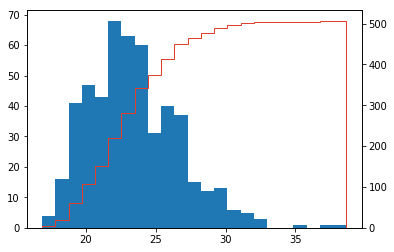

In [106]:
# b. Teken een histogram van alle BMI waarden en ga na of deze normaal verdeeld zijn...
print('Verdeling van alle waardes')
validate_histogram(dataset['Bmi'])


Verdeling van alle waardes voor vrouwen
Klassebreedte bepaald op  1.3219379478468654
Mediaan tov gemiddelde:  21.783033454346754 22.277930738754797
Percentage waardes binnen 1 std afwijking van het gemiddelde:  75.77%
Percentage waardes binnen 2 std afwijking van het gemiddelde:  94.62%
Percentage waardes binnen 3 std afwijking van het gemiddelde:  98.46%

Verdeling van alle waardes voor mannen
Klassebreedte bepaald op  1.1754410599549239
Mediaan tov gemiddelde:  24.30398370303305 24.711230394653864
Percentage waardes binnen 1 std afwijking van het gemiddelde:  70.85%
Percentage waardes binnen 2 std afwijking van het gemiddelde:  96.36%
Percentage waardes binnen 3 std afwijking van het gemiddelde:  99.60%


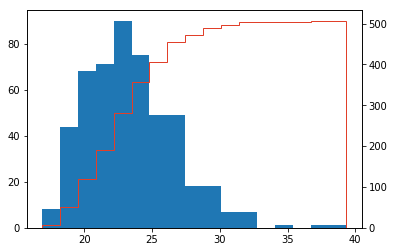

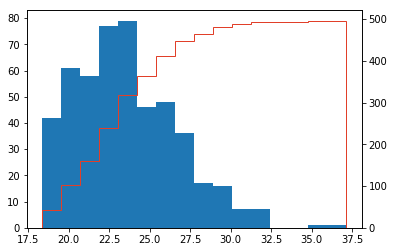

In [107]:
# c. Herhaal het gevraagde onder vraag b, maar splits op in mannen en vrouwen... 
print('Verdeling van alle waardes voor vrouwen')
validate_histogram(dataset.loc[dataset['Geslacht'] == 'vrouw']['Bmi'])
print()
print('Verdeling van alle waardes voor mannen')
validate_histogram(dataset.loc[dataset['Geslacht'] == 'man']['Bmi'])


In [15]:
# d. Is er een groot verschil tussen de distributie van het BMI van mannen en deze van vrouwen? Verklaar ...


Het lijkt alsof de verdeling van de mannen meer voldoet aan een normaalverdeling dan bij de vrouwen.  
- De mediaan ligt veel dichter bij het gemiddelde
- Het aantal waardes binnen het interval van 1 standaard afwijking rond het gemiddelde benaderen veel meer de 68% dan bij de vrouwen
- Wel lijkt het alsof de waardes van de 2 standaardafwijkingen rond het gemiddelde dan iets verder van de 95% liggen
- De algemene verdeling (over geslachten heen) lijkt iets meer normaalverdeeld.

In [122]:
# e. Hoeveel procent van de populatie (niet de steekproef) mannen heeft minstens te maken met 
#    een ernstig overgewicht? En hoeveel procent van de vrouwen?

# We gaan dus uit van normaalverdeling
male_bmi_mean = dataset.loc[dataset['Geslacht'] == 'man']['Bmi'].mean()
male_bmi_stddev = dataset.loc[dataset['Geslacht'] == 'man']['Bmi'].std()
female_bmi_mean = dataset.loc[dataset['Geslacht'] == 'vrouw']['Bmi'].mean()
female_bmi_stddev = dataset.loc[dataset['Geslacht'] == 'vrouw']['Bmi'].std()
#ernstig overgewicht : bmi in [30,40]
print('Percentage mannen met ernstige overgewicht (ziekelijk uitgesloten): ', "{0:.2%}".format(stats.norm.cdf(x=40, loc=male_bmi_mean, scale=male_bmi_stddev)-stats.norm.cdf(x=30, loc=male_bmi_mean, scale=male_bmi_stddev)))
print('Percentage vrouwen met ernstige overgewicht (ziekelijk uitgesloten): ', "{0:.2%}".format(stats.norm.cdf(x=40, loc=female_bmi_mean, scale=female_bmi_stddev)-stats.norm.cdf(x=30, loc=female_bmi_mean, scale=female_bmi_stddev)))

24.711230394653864 22.277930738754797 2.844989378818533 3.2169287040929824
Percentage mannen met ernstige overgewicht (ziekelijk uitgesloten):  3.15%
Percentage vrouwen met ernstige overgewicht (ziekelijk uitgesloten):  0.82%


In [123]:
# f. Hoeveel procent van de populatie (niet de steekproef) mannen heeft een ondergewicht? 
#    En hoeveel procent van de vrouwen? Veronderstel dat de steekproef representatief is voor de populatie.
#ernstig overgewicht : bmi in [30,40]
print('Percentage mannen met ondergewicht (bmi < 18.5): ', "{0:.2%}".format(stats.norm.cdf(x=18.5, loc=male_bmi_mean, scale=male_bmi_stddev)))
print('Percentage vrouwen met ondergewicht (bmi < 18.5): ', "{0:.2%}".format(stats.norm.cdf(x=18.5, loc=female_bmi_mean, scale=female_bmi_stddev)))

Percentage mannen met ondergewicht (bmi < 18.5):  1.45%
Percentage vrouwen met ondergewicht (bmi < 18.5):  12.01%


In [126]:
# g. Ga na of er uitschieters in de dataset aanwezig zijn. 
#    Uitschieters kan je hier beschouwen als de BMI gewichten die meer dan 3 standaardafwijkingen
#    van het gemiddelde liggen.
bmi_stdev = bmi_values.std()
bmi_mean = bmi_values.mean()
bmi_outliers = bmi_values[bmi_values < (bmi_mean - (bmi_stdev * 3))][bmi_values > (bmi_mean + (bmi_stdev * 3))]
print(bmi_outliers.count())
print('Er lijken geen outliers te zijn in de dataset')

0
